In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler






In [35]:
d=pd.read_csv('/content/Net_generation_United_States_all_sectors_monthly.csv')
d

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,9,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,9,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,9,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,9,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,9,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510
...,...,...,...,...,...,...,...,...
273,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Month                                              278 non-null    int64  
 1   all fuels (utility-scale) thousand megawatthours   273 non-null    float64
 2   coal thousand megawatthours                        273 non-null    float64
 3   natural gas thousand megawatthours                 273 non-null    float64
 4   nuclear thousand megawatthours                     273 non-null    float64
 5   conventional hydroelectric thousand megawatthours  273 non-null    float64
 6   wind thousand megawatthours                        273 non-null    float64
 7   all solar thousand megawatthours                   117 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 17.5 KB


In [37]:
d.head()

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,9,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,9,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,9,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,9,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,9,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


In [38]:
d.describe()

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
count,278.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,117.000000
mean,6.104317,337947.552655,127251.140876,94470.528113,65870.679758,22411.638500,13404.842666,9311.091148
std,3.847253,35061.580185,39820.581811,34945.840051,4810.864494,3970.188494,11655.653613,6193.340439
min,1.000000,278078.871000,40078.668020,37966.927000,54547.338000,14367.418410,389.250000,1375.151550
25%,3.000000,310602.963800,91145.411190,65631.018000,62638.950000,19470.632810,2442.129880,4142.592150
50%,5.000000,329838.822400,135634.733300,91739.070090,65638.141000,22033.855740,11519.768420,8184.135870
75%,10.000000,358630.102200,159439.517300,117351.492900,69870.978000,25079.216970,22100.722070,12437.957510
max,12.000000,425611.328400,190134.816300,200506.759200,74649.040000,32607.115140,46167.094770,26538.557250


In [39]:
d.columns

Index(['Month', 'all fuels (utility-scale) thousand megawatthours',
       'coal thousand megawatthours', 'natural gas thousand megawatthours',
       'nuclear thousand megawatthours',
       'conventional hydroelectric thousand megawatthours',
       'wind thousand megawatthours', 'all solar thousand megawatthours'],
      dtype='object')

In [40]:
d.isnull().sum()

Month                                                  0
all fuels (utility-scale) thousand megawatthours       5
coal thousand megawatthours                            5
natural gas thousand megawatthours                     5
nuclear thousand megawatthours                         5
conventional hydroelectric thousand megawatthours      5
wind thousand megawatthours                            5
all solar thousand megawatthours                     161
dtype: int64

In [41]:
x=d.drop(['coal thousand megawatthours'],axis=1)
x.head()

,Month,all fuels (utility-scale) thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,9,358136.2599,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,9,423934.2574,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,9,425611.3284,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,9,356672.3849,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,9,327532.6236,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


In [42]:
df1 = d.dropna()
print(df1)

     Month  all fuels (utility-scale) thousand megawatthours  \
0        9                                       358136.2599   
1        9                                       423934.2574   
2        9                                       425611.3284   
3        9                                       356672.3849   
4        9                                       327532.6236   
..     ...                                               ...   
112      1                                       324719.3071   
113      1                                       297628.2622   
114      1                                       331820.9692   
115      1                                       324347.0162   
116      1                                       377251.3784   

     coal thousand megawatthours  natural gas thousand megawatthours  \
0                    60005.67580                        164466.35680   
1                    78184.50094                        199993.04220   
2              

In [43]:
x=df1.drop(['coal thousand megawatthours'],axis=1)
x.head()

,Month,all fuels (utility-scale) thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,9,358136.2599,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,9,423934.2574,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,9,425611.3284,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,9,356672.3849,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,9,327532.6236,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


In [61]:
y=df1['Month']
y.head()

0    9
1    9
2    9
3    9
4    9
Name: Month, dtype: int64

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
type(y)


pandas.core.series.Series

In [63]:
log_reg=LogisticRegression()

In [64]:
log_reg.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred=log_reg.predict(x_test)
y_pred


array([12, 11, 12,  1, 12, 12, 10, 11, 11, 12, 12, 12,  9, 11,  1, 11,  1,
       12, 11, 11, 12, 10,  1, 12, 12, 12, 10, 11, 12, 10, 10, 11, 12, 11,
       10, 12])

In [53]:
confusion_matrix(y_test,y_pred)

array([[ 3,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  5,  1,  0],
       [ 0,  0,  1,  9,  2],
       [ 1,  0,  0,  0, 12]])

In [54]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.33%


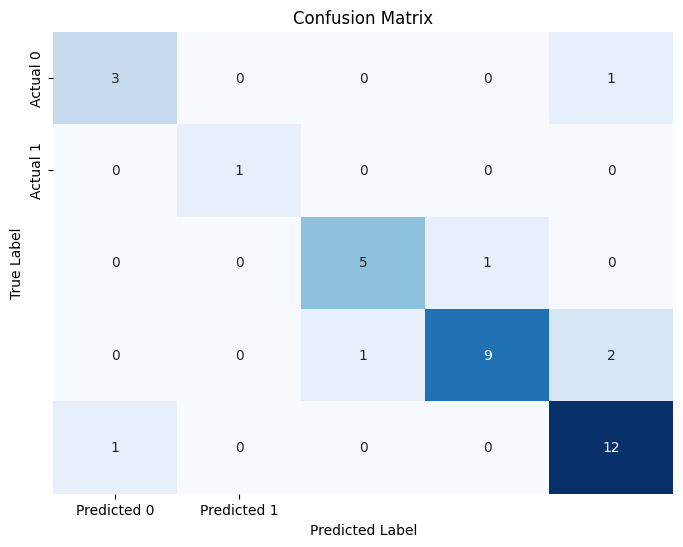

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Accuracy: 77.78%


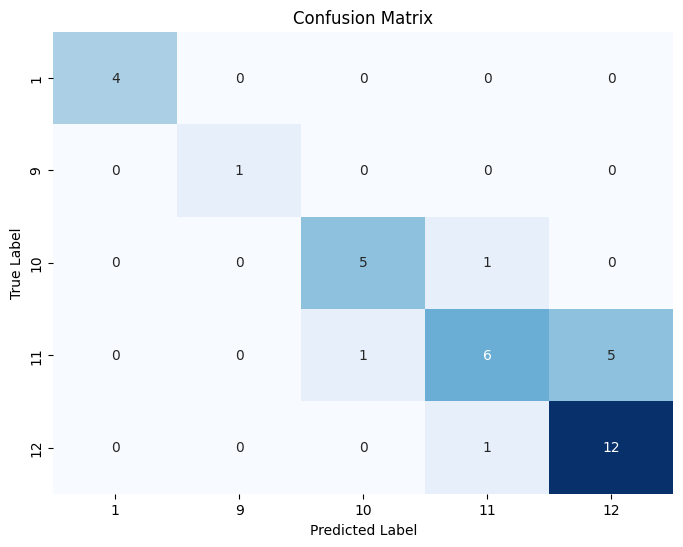

In [56]:
# Standardize features (important for logistic regression)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(x_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=logreg.classes_,
            yticklabels=logreg.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
